## Below codes is meant to built to ompare different House price prediction models built using plain Linear Regression, Lasso Regression and Ridge Regression to better understand and demonstrate the effects of Lasso Regression and Ridge Regression, aka L1/L2 Regularization. Dataset of house price is downloaded from Kaggle

In [ ]:
# Step 1: Importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split, cross_val_score
from statistics import mean

In [27]:
# Step 2: Loading and cleaning the data
data = pd.read_csv("C:/Users/LylionCj/Desktop/Demo Proforlio/PythonCodes/kc_house_data.csv",sep=',')
# Dropping the numerically non-sensical variables
dropColumns = ['id','date','zipcode']
data = data.drop(dropColumns, axis = 1)
# Dropping the Nan values
data = data.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)
# Separating the dependent and independent variables
y = data['price']
X = data.drop('price',axis=1)
# Dividing the data into training an testing set 
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25)
y_test = np.nan_to_num(y_test)

In [28]:
# Step 3: Building and evaluating different models
## A) Building a Linear Regression prediction model 
linearModel = LinearRegression()
linearModel.fit(X_train, y_train)

## Evaluating the linear regression model 
print(linearModel.score(X_test,y_test))

0.6976282426249267


In [30]:
## B) Building a Ridge Regression prediction model
# List to maintain the different cross validation scores
cross_val_scores_ridge = [ ]
# List to maintain the different values of alpha 
alpha = [ ]
# Loop to compute the different values of cross validation scores 
for i in range(1,9):
    ridgeModel = Ridge(alpha = i * 0.25)
    ridgeModel.fit(X_train, y_train)
    scores = cross_val_score(ridgeModel, X, y,cv=10)
    avg_cross_val_score = mean(scores) * 100
    cross_val_scores_ridge.append(avg_cross_val_score)
    alpha.append(i*0.25)
    
# Loop to print the different values of cross validation scores 
for i in range(0,len(alpha)):
    print(str(alpha[i])+ ':'+str(cross_val_scores_ridge[i]) )

0.25:69.09015837671012
0.5:69.09033468066413
0.75:69.09049125083848
1.0:69.09062828999275
1.25:69.09074599856254
1.5:69.09084457469037
1.75:69.0909242142566
2.0:69.09098511090886


## From the above output we can conclude that the best value of alpha for the data is 2

In [31]:
# Building and fitting the Ridge Regression model
ridgeModelChosen = Ridge(alpha = 2)
ridgeModelChosen.fit(X_train,y_train)
# Evaluating the Ridge Regression Model
print(ridgeModelChosen.score(X_test,y_test))

0.697530135700664


In [32]:
## C) Building the Lasso Regression Model
# List to maintain the cross validation scores 
cross_val_scores_lasso = [ ]
# List to maintain the different values of Lambda
Lambda = [ ]

# Loop to compute the cross_validation scores
for i in range(1,9):
    lassoModel = Lasso(alpha = i * 0.25, tol = 0.0925)
    lassoModel.fit(X_train, y_train)
    scores = cross_val_score(lassoModel, X, y, cv = 10)
    avg_cross_val_score = mean(scores) * 100
    cross_val_scores_lasso.append(avg_cross_val_score)
    Lambda.append(i*0.25)
    
# Loop to print the different values of cross validation scores 
for i in range(0, len(alpha)):
    print(str(alpha[i])+ ':'+str(cross_val_scores_lasso[i]))

0.25:69.08996762461638
0.5:69.08997309354581
0.75:69.08997853389327
1.0:69.08998394768226
1.25:69.0899893270766
1.5:69.08999467945567
1.75:69.09000001882957
2.0:69.09000531192426


## From the above output, we can conclude that the best value of lambda is 2

In [33]:
# Building and fitting the Lasso Regression Model
lassoModelChosen = Lasso(alpha = 2, tol = 0.0925)
lassoModelChosen.fit(X_train, y_train)

# Evaluating the Lasso Regression model
print(lassoModelChosen.score(X_test,y_test))

0.6976255358359325


In [36]:
# Step 4: Comparing and Visualizing the results 
## Building the two lists for visualization 
models = ['Linear Regression','Ridge Regression','Lasso Regression']
scores = [linearModel.score(X_test,y_test),
          ridgeModelChosen.score(X_test,y_test),
          lassoModelChosen.score(X_test,y_test)]

# Building the dictionary to compare the scores
mapping = { }
mapping['Linear Regression'] = linearModel.score(X_test, y_test)
mapping['Ridge Regression'] = ridgeModelChosen.score(X_test, y_test)
mapping['Lasso Regression'] = lassoModelChosen.score(X_test, y_test)

# Print the scores for different models 
for key, val in mapping.items( ):
    print(str(key)+ ':'+str(val))

Linear Regression:0.6976282426249267
Ridge Regression:0.697530135700664
Lasso Regression:0.6976255358359325


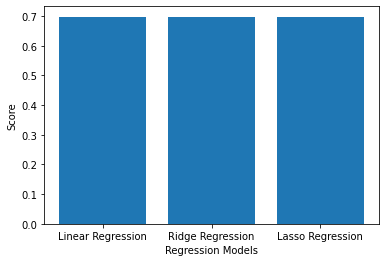

In [35]:
# Plotting the scores
plt.bar(models,scores)
plt.xlabel('Regression Models')
plt.ylabel('Score')
plt.show()